# Lab3 - Data Classification
## Abeer Ahmad (38) - Mohammed Deifallah (59)
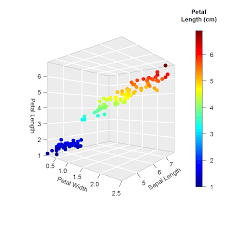


# Imports

In [1]:
from pprint import pprint

import numpy as np
import pandas as pd

import random

from pandas.plotting import scatter_matrix
from sklearn.cross_validation import train_test_split

from scipy import stats
from sklearn.decomposition import PCA

from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import fbeta_score
from time import time

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

/home/abeer/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# 1. Download and Read Data

Downloading the [Magic Gamma Telescope dataset](https://archive.ics.uci.edu/ml/datasets/MAGIC+Gamma+Telescope)

## 1.1. Reading the dataset from CSV file

In [2]:
dataset = pd.read_csv("data.csv")
dataset.sort_values(by='class', inplace = True, axis=0)
dataset.reset_index(drop=True, inplace=True)
classes = dataset['class'].unique()
features = dataset.drop(['class'], axis = 1).columns

## 1.2. Dataset Structure

In [3]:
print('Magic Gamma Telescope dataset has ' + str(len(dataset)) + ' readings')
print('Magic Gamma Telescope dataset has ' + str(len(features)) + ' attributes')
print('Magic Gamma Telescope dataset has ' + str(len(classes)) + ' classes:')
for label in classes:
    print('\t-' + label + ': ' + str(len(dataset[dataset['class'] == label])) + ' samples')

Magic Gamma Telescope dataset has 19020 readings
Magic Gamma Telescope dataset has 10 attributes
Magic Gamma Telescope dataset has 2 classes:
	-g: 12332 samples
	-h: 6688 samples


---
**Comments:**
*  **Dataset is not balanced.**

# 2. Data Balancing and Visualization

## 2.1. Data Balancing

In [4]:
g_len = len(dataset[dataset['class'] == 'g'])
h_len = len(dataset[dataset['class'] == 'h'])
indices = set(random.sample(list(range(g_len)), g_len - h_len))
balanced_dataset = dataset.drop(indices)

In [5]:
# check the lengths now
for label in classes:
    print('\t-' + label + ': ' + str(len(balanced_dataset[balanced_dataset['class'] == label])) + ' samples')

	-g: 6688 samples
	-h: 6688 samples


## 2.2. Data Visualization

In [6]:
X_df = balanced_dataset.drop(['class'], axis = 1)
y_df = balanced_dataset['class']
balanced_dataset_numpy = np.array(X_df)
label_numpy = np.array(y_df)

In [7]:
display(X_df.describe())

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
count,13376.000000,13376.000000,13376.000000,13376.000000,13376.000000,13376.000000,13376.000000,13376.000000,13376.000000,13376.000000
mean,57.157859,23.637165,2.839347,0.379460,0.214764,-7.489405,7.374690,0.287620,31.278334,195.391982
std,46.909761,20.863422,0.472100,0.184105,0.111902,65.293442,56.320752,23.204482,26.857673,76.428548
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,24.698450,11.738425,2.495975,0.234575,0.127700,-24.004500,-14.872575,-10.891600,7.319350,142.850250
50%,38.593850,17.125100,2.752000,0.355400,0.197500,2.789200,14.633100,0.436900,23.305000,193.375000
75%,75.665150,26.042725,3.115400,0.505300,0.286900,23.651350,34.680600,11.075050,52.213150,242.935925
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


---
**Comments:**
*  **Distribution varies significantly among different features and normalization is surely needed for later processing.**



### 2.2.1. Histograms

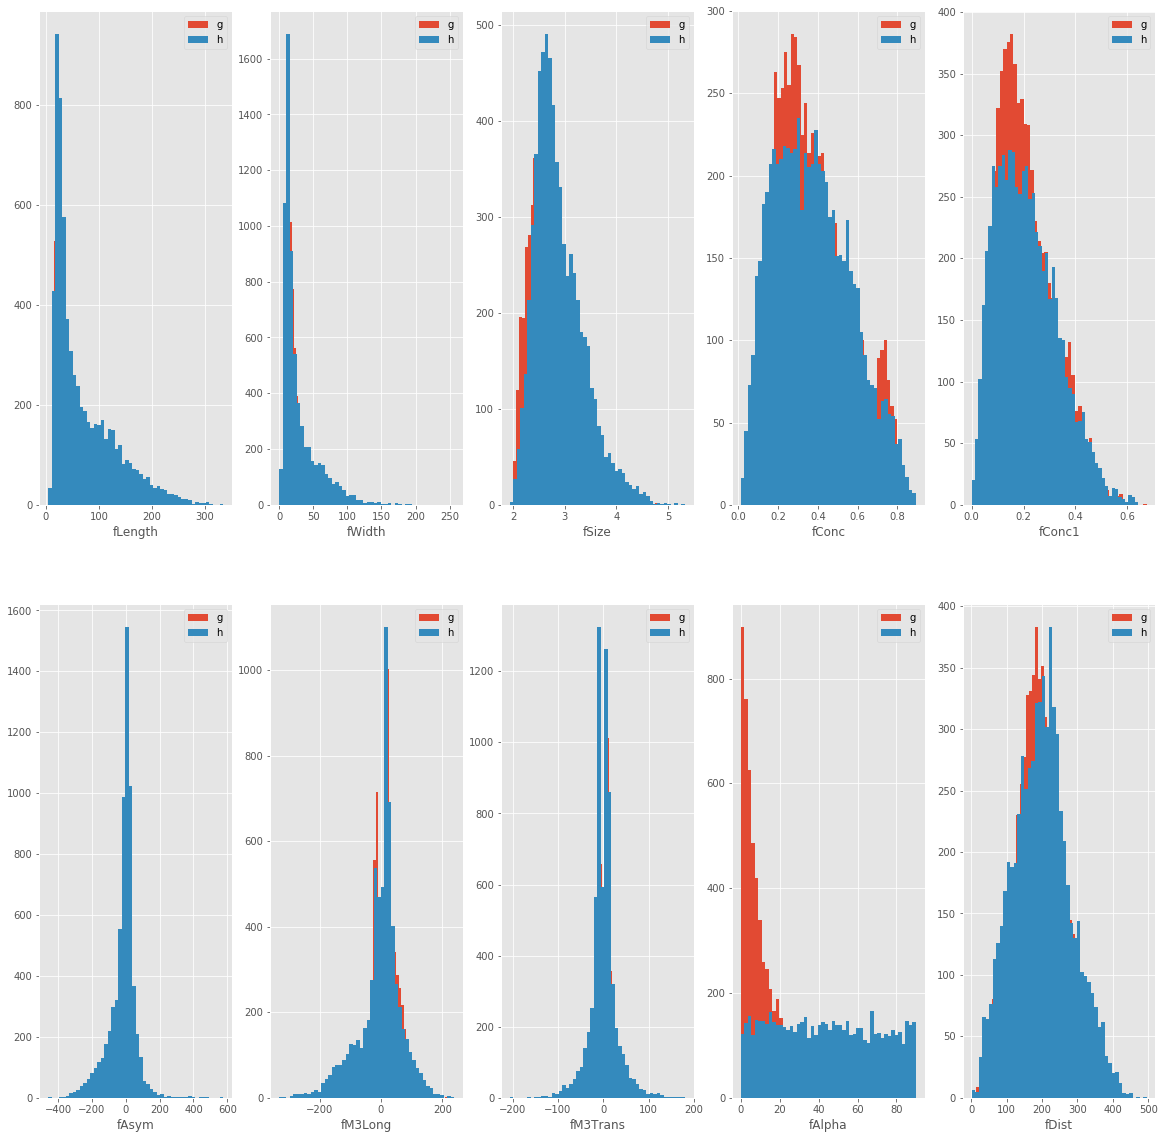

In [8]:
fig, axes = plt.subplots(nrows= 2, ncols=int(len(features)/2), figsize=(20,20))
colors= ['red', 'green']
for i, ax in enumerate(axes.flat):
    for label, color in zip(classes, colors):
        ax.hist(balanced_dataset_numpy[label_numpy==label, i], bins=50, label=label, # plot only examples belonging to that class
                    alpha=1, stacked=True)
        ax.set_xlabel(features[i])  
        ax.legend(loc='upper right')
plt.show()

### 2.2.2. Box Plots

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


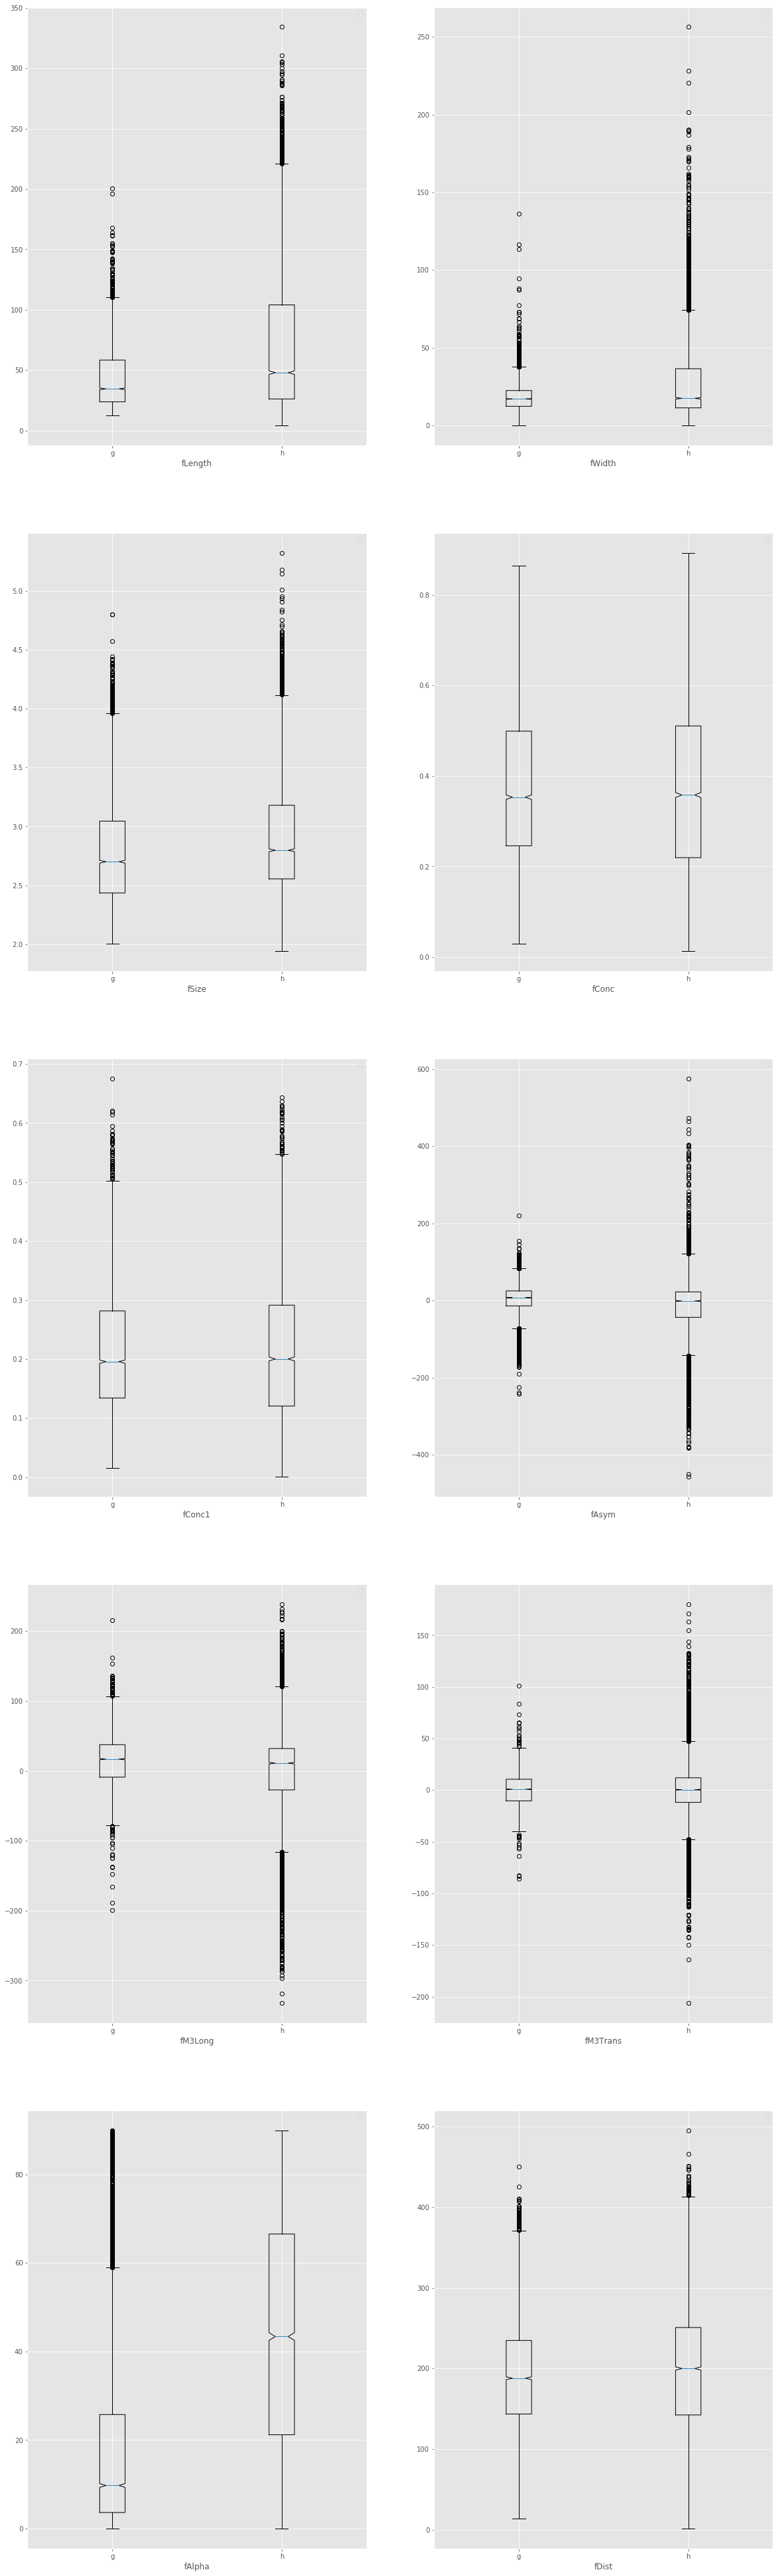

In [9]:
fig, axes = plt.subplots(nrows = 5, ncols = 2, figsize=(20,70))
for i, ax in enumerate(axes.flat):
    ax.boxplot([balanced_dataset_numpy[label_numpy == 'g', i], balanced_dataset_numpy[label_numpy == 'h', i]], notch=True, labels=classes)
    ax.set_xlabel(features[i])
    ax.legend(loc='upper right')
plt.show()

---
**Comments:**
*  **Per-feature box plots show that some outlier detection techniques may be used.**

### 2.2.3. Scatter Plot

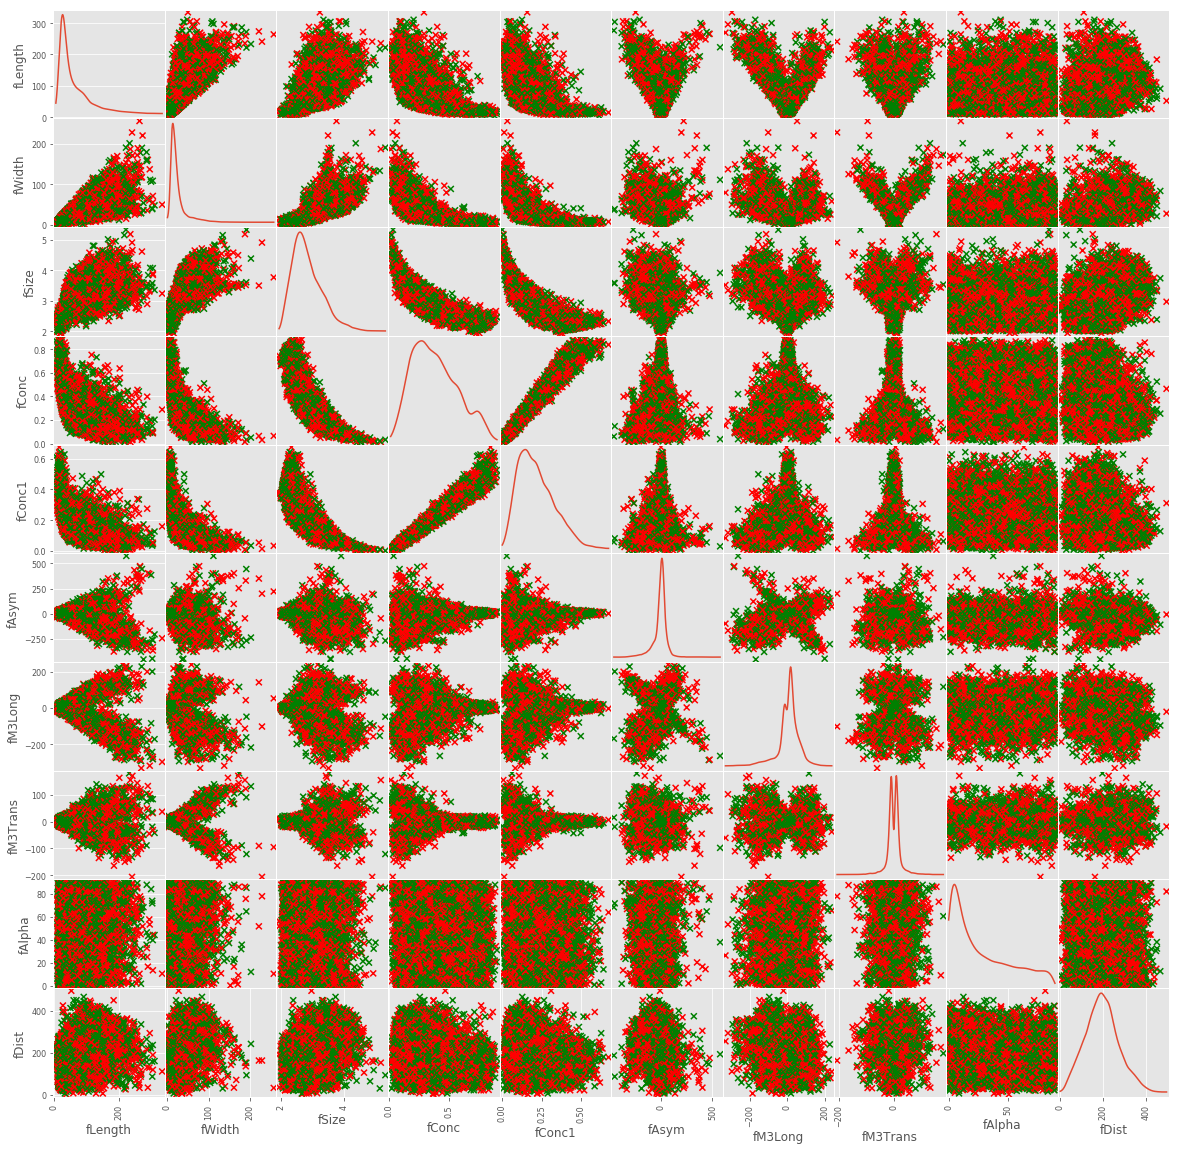

In [10]:
scatter_matrix(X_df, alpha=1, figsize=(20, 20), marker="x", diagonal='kde', color=np.array(50*['r']+50*['g']))
plt.show()

### 2.2.4. Correlation Matrix

In [11]:
correlation_matrix = X_df.corr(method='pearson')
display(correlation_matrix)

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
fLength,1.000000,0.775612,0.709267,-0.636245,-0.601935,-0.397336,-0.204319,0.010645,0.037849,0.386546
fWidth,0.775612,1.000000,0.730917,-0.618034,-0.587499,-0.292957,-0.234680,0.035956,0.094650,0.339462
fSize,0.709267,0.730917,1.000000,-0.846493,-0.803344,-0.213029,-0.015482,0.008851,-0.112927,0.424456
fConc,-0.636245,-0.618034,-0.846493,1.000000,0.975318,0.155336,-0.039447,-0.006971,0.161146,-0.312572
fConc1,-0.601935,-0.587499,-0.803344,0.975318,1.000000,0.140736,-0.040158,-0.006713,0.159173,-0.289555
fAsym,-0.397336,-0.292957,-0.213029,0.155336,0.140736,1.000000,0.283539,0.004262,-0.045979,-0.214807
fM3Long,-0.204319,-0.234680,-0.015482,-0.039447,-0.040158,0.283539,1.000000,-0.020343,-0.148927,-0.023482
fM3Trans,0.010645,0.035956,0.008851,-0.006971,-0.006713,0.004262,-0.020343,1.000000,0.006803,0.011012
fAlpha,0.037849,0.094650,-0.112927,0.161146,0.159173,-0.045979,-0.148927,0.006803,1.000000,-0.167590
fDist,0.386546,0.339462,0.424456,-0.312572,-0.289555,-0.214807,-0.023482,0.011012,-0.167590,1.000000


In [12]:
def heatmap(data, row_labels, row_intervals, col_labels, col_intervals,
            yticklabel_size=10, xticklabel_size=10, rotate=False, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):

    # If 'ax' in not passed, get the current Axes instance on the current
    # figure matching the given keyword args, or create one.
    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, aspect="equal", **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, fraction=0.046, pad=0.04, **cbar_kw) # 'fraction' and 'pad' properties are for the colorbar alignment
    cbar.ax.set_ylabel(cbarlabel, size=18, rotation=-90, va="bottom") # 'weight' property can be used for bold text (weight='bold')
    
    # We want to show ticks at the middle of each class...
    ax.set_xticks(col_intervals) # np.arange: returns evenly spaced values within a given interval
    ax.set_yticks(row_intervals)
    # ... and label them with the respective classes.
    ax.set_xticklabels(col_labels, size=xticklabel_size)
    ax.set_yticklabels(row_labels, size=yticklabel_size)
        
    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)
    
    # If rotate is true, rotate the xtick labels and set their alignment.
    if rotate:
        plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")
    
    ax.grid('off')
    
    return im, cbar

/home/abeer/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


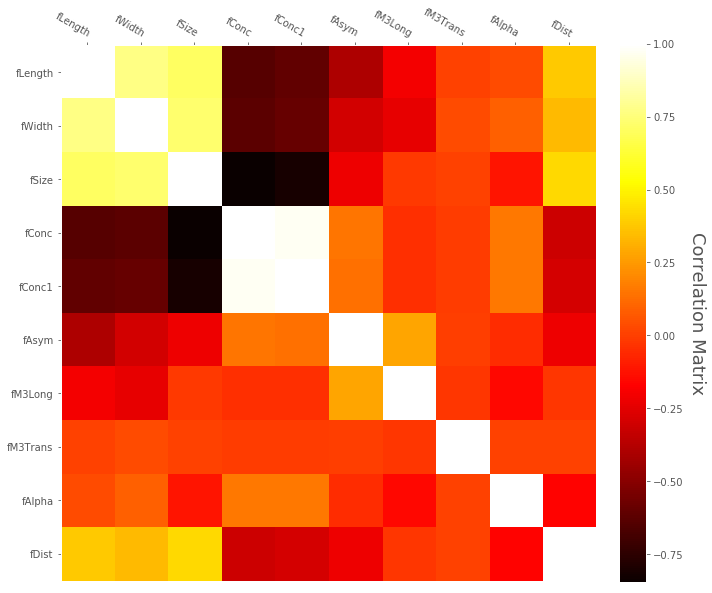

In [13]:
intervals = np.arange(len(features));
fig, ax = plt.subplots(figsize=(10, 10))
im, cbar = heatmap(correlation_matrix,features, intervals, features, intervals, rotate=True,
                   ax=ax, cmap="hot", cbarlabel="Correlation Matrix")

fig.tight_layout() # automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.show()

---
**Comments:**
*  **Features are nearly independent and feature reduction/selection techniques might not be of great use.**

### 2.2.5. Line Plots

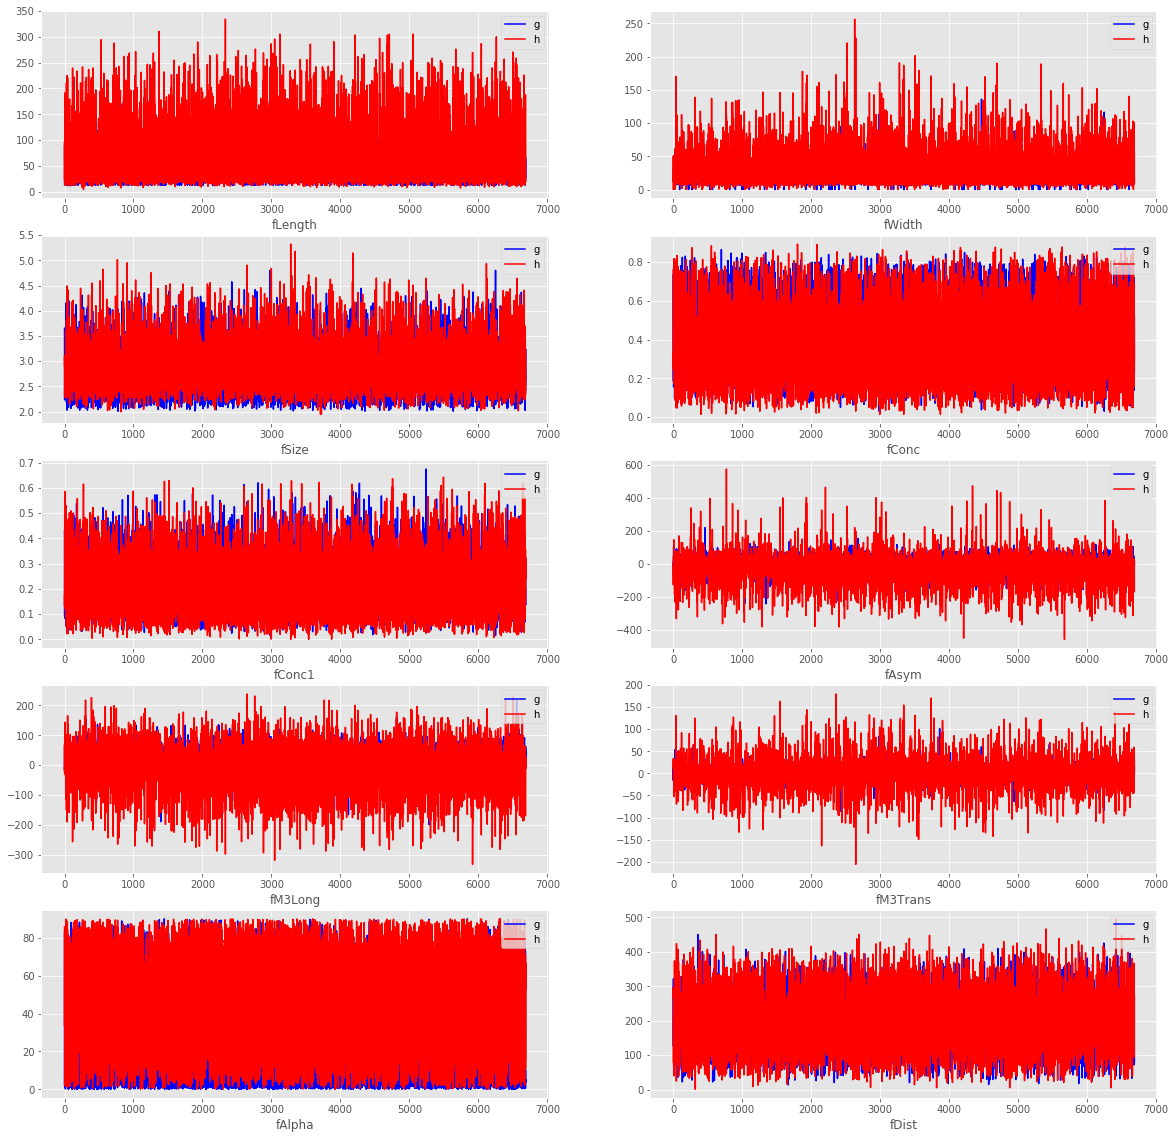

In [14]:
fig, axes = plt.subplots(nrows = 5, ncols = 2, figsize=(20,20))
colors= ['blue', 'red']

for i, ax in enumerate(axes.flat):
    for label, color in zip(classes, colors):
        ax.plot(balanced_dataset_numpy[label_numpy==label, i], label=label, color=color)
        ax.set_xlabel(features[i])  
        ax.legend(loc='upper right')
        
plt.show()

# 3. Data Split
The dataset is randomly split into two disjoint sets, so that the training set would form $70$% of the dataset and the testing set would form $30$% of it.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.3, random_state=0)

In [16]:
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [17]:
print("Size of Training Data:{}".format(len(X_train)))
print("Size of Testing Data:{}".format(len(X_test)))

Size of Training Data:9363
Size of Testing Data:4013


# 4. Data Preprocessing

## 4.1. Outliers Removal

In [18]:
outliers = []

for class_ in classes:
# For each feature find the data points with extreme high or low values
    temp_outliers = []
    for feature in X_train.keys():
        X_class = X_train[y_train==class_]

        # TODO: Calculate Q1 (25th percentile of the data) for the given feature
        Q1 = np.percentile(X_class[feature], 25)

        # TODO: Calculate Q3 (75th percentile of the data) for the given feature
        Q3 = np.percentile(X_class[feature], 75)

        # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
        step = 1.5 * (Q3 - Q1)

        # Display the outliers
        #print("Data points considered outliers for the feature '{}':".format(feature))
        #display(X_train[~((X_train[feature] >= Q1 - step) & (X_train[feature] <= Q3 + step))])
        temp_outliers += X_class[~((X_class[feature] >= Q1 - step) & (X_class[feature] <= Q3 + step))].index.tolist()

    outliers = sorted({i for i in temp_outliers if temp_outliers.count(i) > 5})
print("Training Dataset length: {}".format(len(X_train)))
print("The number of outliers: {}".format(len(outliers)))

Training Dataset length: 9363
The number of outliers: 4


In [19]:
X_clean = X_train.drop(X_train.index[outliers]).reset_index(drop = True)
y_clean = y_train.drop(X_train.index[outliers]).reset_index(drop = True)

## 4.2. Z-Normalization

In [20]:
X_normalized_train = stats.zscore(X_clean)
X_normalized_test = stats.zscore(X_test)

## 4.3. PCA

In [21]:
def plot_pca(good_data, pca):
    '''
    Create a DataFrame of the PCA results
    Includes dimension feature weights and explained variance
    Visualizes the PCA results
    '''

    # Dimension indexing
    dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = features)
    components.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions

    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (20,20))

    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar', figsize=(20,20));
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(dimensions, rotation=0)


    # Display the explained variance ratios
    for i, ev in enumerate(pca.explained_variance_ratio_):
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))

    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)


### 4.3.1. Different # of Components

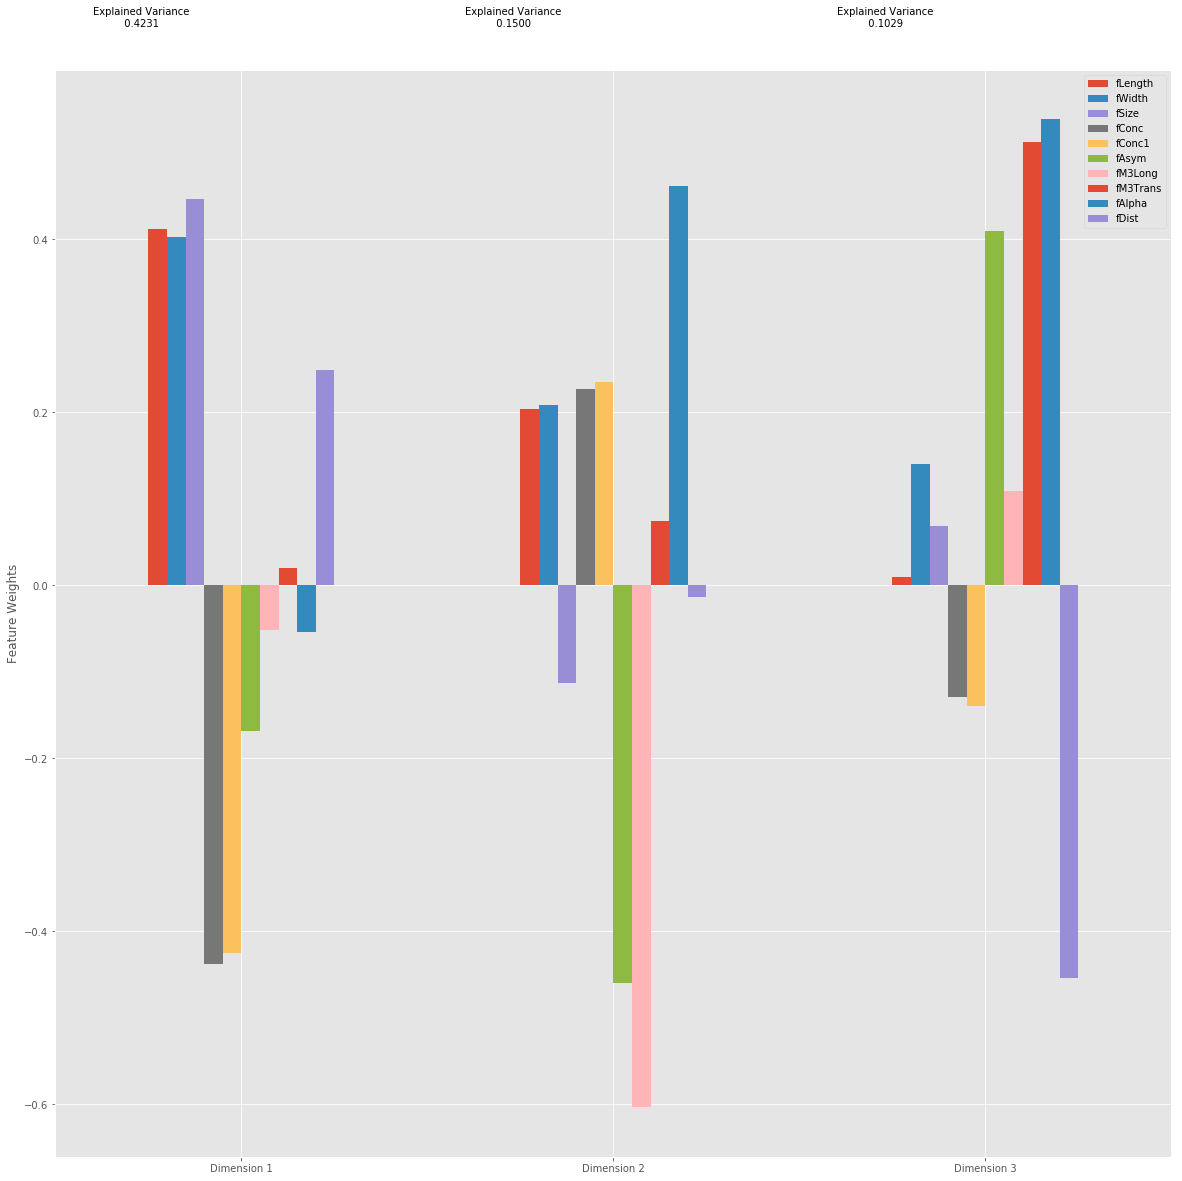

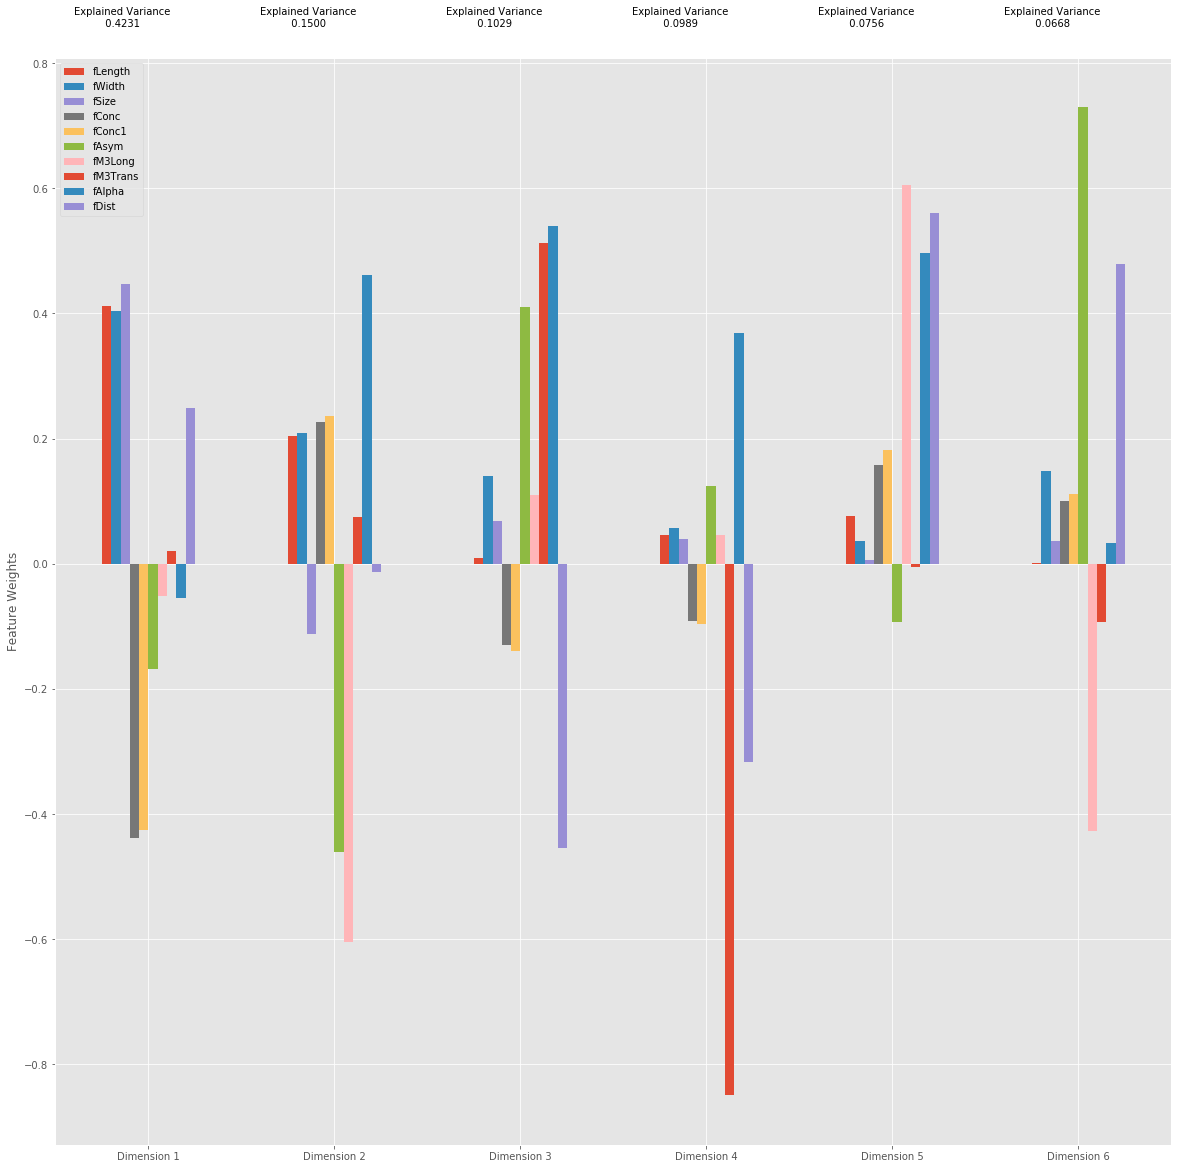

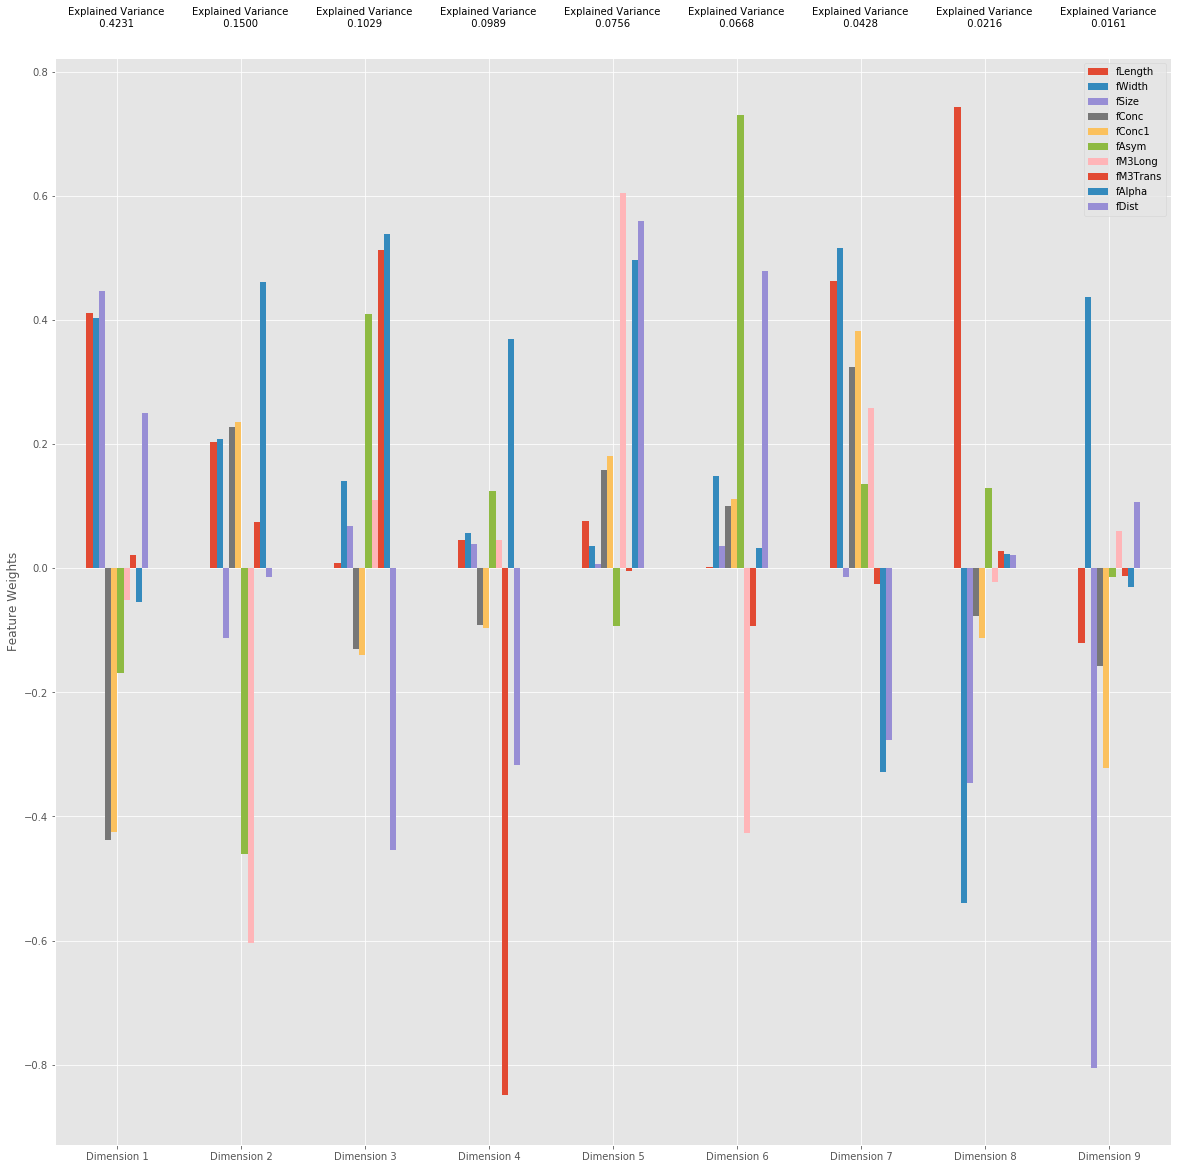

In [22]:
num_of_components = [3, 6, 9]
for i in num_of_components:
    pca = PCA(n_components = i)
    pca.fit(X_normalized_train)

    # Generate PCA results plot
    plot_pca(X_normalized_train, pca)

### 4.3.2. Applying PCA

,Explained Variance,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
Dimension 1,0.4231,0.4119,0.4033,0.4463,-0.4374,-0.4248,-0.1686,-0.0515,0.0206,-0.0544,0.2496
Dimension 2,0.1500,0.2036,0.2087,-0.1127,0.2270,0.2357,-0.4601,-0.6038,0.0743,0.4619,-0.0137
Dimension 3,0.1029,0.0092,0.1408,0.0682,-0.1295,-0.1391,0.4099,0.1096,0.5124,0.5393,-0.4538
Dimension 4,0.0989,0.0453,0.0570,0.0391,-0.0913,-0.0964,0.1246,0.0456,-0.8494,0.3688,-0.3170
Dimension 5,0.0756,0.0767,0.0356,0.0066,0.1581,0.1810,-0.0934,0.6050,-0.0051,0.4970,0.5597
Dimension 6,0.0668,0.0013,0.1486,0.0360,0.1001,0.1121,0.7298,-0.4270,-0.0924,0.0325,0.4791


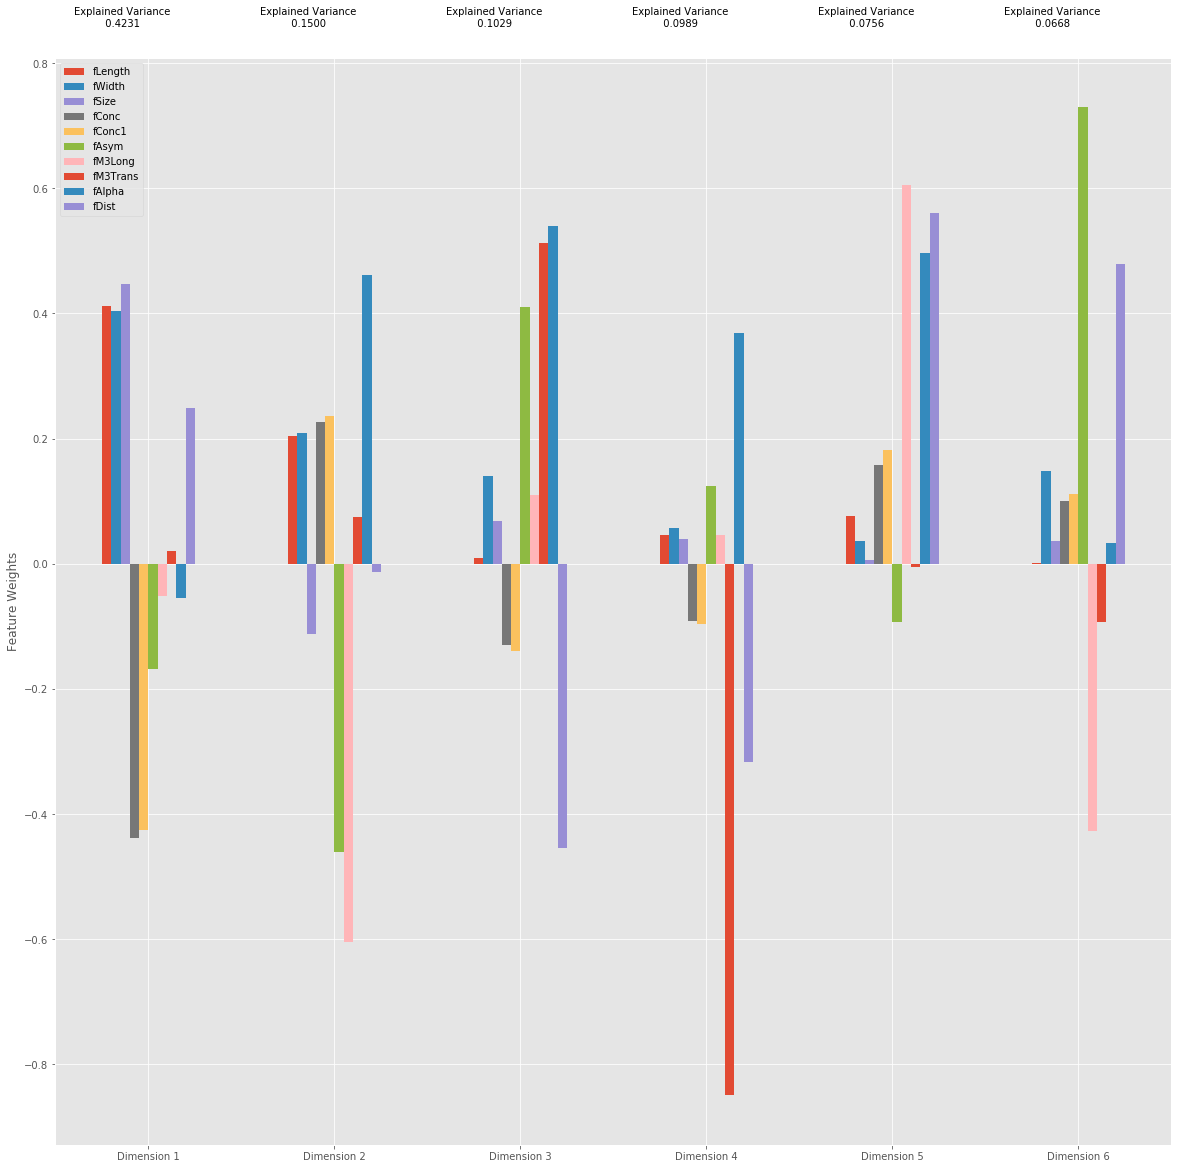

In [23]:
# 85% or more is an empirical value of the total variance.
pca = PCA(.90, random_state=0)
pca.fit(X_normalized_train)
plot_pca(X_normalized_train, pca)

In [24]:
features_reduced = ["d" + feature for feature in np.arange(1, pca.n_components_+1).astype('str')]
X_reduced_train = pd.DataFrame(pca.transform(X_normalized_train), columns=features_reduced)
X_reduced_test = pd.DataFrame(pca.transform(X_normalized_test), columns=features_reduced)

In [25]:
display(X_reduced_train.head())

,d1,d2,d3,d4,d5,d6
0,0.935335,-1.033152,2.559675,0.894669,-0.553075,-0.732513
1,-1.269782,0.335352,0.996544,-0.124075,1.488967,0.522667
2,-0.819437,-0.124950,-0.447600,0.110286,0.629074,0.320451
3,0.529315,-0.997491,0.264035,0.409746,-1.056546,-0.325811
4,-1.370291,0.224109,-0.907364,-1.077844,-0.187769,0.134455


## 4.4. Reduced Correlation Matrix

In [26]:
reduced_correlation_matrix = X_reduced_train.corr(method='pearson')
display(reduced_correlation_matrix)

,d1,d2,d3,d4,d5,d6
d1,1.000000e+00,2.952393e-16,4.006871e-17,-6.272937e-17,9.141846e-17,1.630573e-16
d2,2.952393e-16,1.000000e+00,1.571622e-16,1.625044e-16,1.327985e-16,-3.813546e-17
d3,4.006871e-17,1.571622e-16,1.000000e+00,7.423742e-17,-2.587907e-16,-7.096808e-17
d4,-6.272937e-17,1.625044e-16,7.423742e-17,1.000000e+00,9.423677e-17,-7.275042e-17
d5,9.141846e-17,1.327985e-16,-2.587907e-16,9.423677e-17,1.000000e+00,3.171112e-16
d6,1.630573e-16,-3.813546e-17,-7.096808e-17,-7.275042e-17,3.171112e-16,1.000000e+00


/home/abeer/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


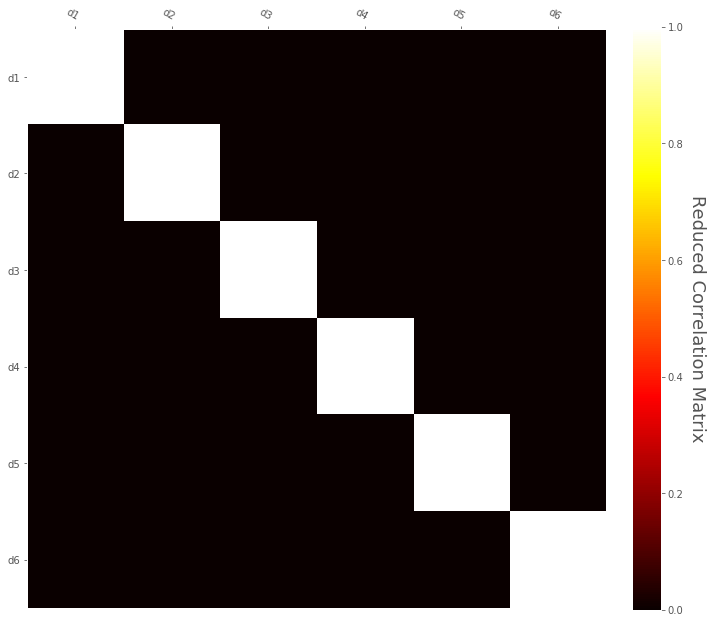

In [27]:
intervals = np.arange(len(features_reduced))
fig, ax = plt.subplots(figsize=(10, 10))
im, cbar = heatmap(reduced_correlation_matrix, features_reduced, intervals, features_reduced, intervals, rotate=True,
                   ax=ax, cmap="hot", cbarlabel="Reduced Correlation Matrix")

fig.tight_layout() # automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.show()

---
**Comments:**
*  **New features are completely independent.**

# 5. Classification

## 5.1. Cross Validation with Hyperparameter Tuning
As discussed in class, Cross-validation is used to tune the parameters of classifiers. 

In [28]:
# Applies cross-validation with hyperparameter tuning
# over the passed training date []X_train, y_train]
# and returns the best learned model along with the corresponding learned parameters
def tune(model, param_grid, k_folds, X_train, y_train):
    grid_search = GridSearchCV(model, param_grid, cv=k_folds, n_jobs=-1) # (n_jobs=-1) runs computations in parallel if supported
    grid_search.fit(X_train, y_train)
    y_predict = grid_search.predict(X_train)
    return grid_search.best_estimator_, grid_search.best_params_, y_predict

### 5.1.1 Non-preprocessed Data

In [29]:
non_preprocessed_models = [KNeighborsClassifier(), SVC(), RandomForestClassifier(), AdaBoostClassifier()]
param_grid_list = [{'n_neighbors': list(range(3, 31, 3))},
                  {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
                  {'n_estimators': [10, 50, 100, 150, 200]},
                  {'n_estimators': [10, 50, 100, 150, 200]}]
non_preprocessed_tuned_models = []
for model, param_grid in zip(non_preprocessed_models, param_grid_list):
    best_estimator, best_params, y_predict = tune(model, param_grid, 10, X_train, y_train)
    non_preprocessed_tuned_models.append(best_estimator)
    print('{} trained with training accuracy = {}'.format(model.__class__.__name__, accuracy_score(y_train, y_predict)))
    print(classification_report(y_train, y_predict))
    print('Best parameters obtained: {}'.format(best_params))
    print('-----------------------------------------------------------------------')

KNeighborsClassifier trained with training accuracy = 0.8149097511481362
             precision    recall  f1-score   support

          g       0.77      0.89      0.83      4718
          h       0.87      0.73      0.80      4645

avg / total       0.82      0.81      0.81      9363

Best parameters obtained: {'n_neighbors': 9}
-----------------------------------------------------------------------
SVC trained with training accuracy = 0.9998931966250133
             precision    recall  f1-score   support

          g       1.00      1.00      1.00      4718
          h       1.00      1.00      1.00      4645

avg / total       1.00      1.00      1.00      9363

Best parameters obtained: {'C': 1}
-----------------------------------------------------------------------
RandomForestClassifier trained with training accuracy = 1.0
             precision    recall  f1-score   support

          g       1.00      1.00      1.00      4718
          h       1.00      1.00      1.00      46

In [30]:
non_preprocessed_naive_bayes = GaussianNB()
non_preprocessed_naive_bayes.fit(X_train, y_train)
non_preprocessed_tuned_models.append(non_preprocessed_naive_bayes)
y_predict = non_preprocessed_naive_bayes.predict(X_train)
print('{} trained with training accuracy = {}'.format(non_preprocessed_naive_bayes.__class__.__name__, accuracy_score(y_train, y_predict)))
print(classification_report(y_train, y_predict))

GaussianNB trained with training accuracy = 0.6481896827939763
             precision    recall  f1-score   support

          g       0.60      0.89      0.72      4718
          h       0.78      0.40      0.53      4645

avg / total       0.69      0.65      0.63      9363



### 5.1.2 Preprocessed Data with PCA Applied

In [31]:
models = [KNeighborsClassifier(), SVC(), RandomForestClassifier(), AdaBoostClassifier()]
param_grid_list = [{'n_neighbors': list(range(3, 31, 3))},
                  {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
                  {'n_estimators': [10, 50, 100, 150, 200]},
                  {'n_estimators': [10, 50, 100, 150, 200]}]
tuned_models = []
for model, param_grid in zip(models, param_grid_list):
    best_estimator, best_params, y_predict = tune(model, param_grid, 10, X_reduced_train, y_clean)
    tuned_models.append(best_estimator)
    print('{} trained with training accuracy = {}'.format(model.__class__.__name__, accuracy_score(y_clean, y_predict)))
    print(classification_report(y_clean, y_predict))
    print('Best parameters obtained: {}'.format(best_params))
    print('-----------------------------------------------------------------------')

KNeighborsClassifier trained with training accuracy = 0.7825622395555081
             precision    recall  f1-score   support

          g       0.74      0.87      0.80      4718
          h       0.84      0.69      0.76      4641

avg / total       0.79      0.78      0.78      9359

Best parameters obtained: {'n_neighbors': 30}
-----------------------------------------------------------------------
SVC trained with training accuracy = 0.7958115183246073
             precision    recall  f1-score   support

          g       0.77      0.85      0.81      4718
          h       0.83      0.74      0.78      4641

avg / total       0.80      0.80      0.80      9359

Best parameters obtained: {'C': 1}
-----------------------------------------------------------------------
RandomForestClassifier trained with training accuracy = 1.0
             precision    recall  f1-score   support

          g       1.00      1.00      1.00      4718
          h       1.00      1.00      1.00      4

In [32]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_reduced_train, y_clean)
tuned_models.append(naive_bayes)
y_predict = naive_bayes.predict(X_reduced_train)
print('{} trained with training accuracy = {}'.format(naive_bayes.__class__.__name__, accuracy_score(y_clean, y_predict)))
print(classification_report(y_clean, y_predict))

GaussianNB trained with training accuracy = 0.6988994550699861
             precision    recall  f1-score   support

          g       0.66      0.83      0.74      4718
          h       0.77      0.56      0.65      4641

avg / total       0.71      0.70      0.69      9359



### 5.1.3 Preprocessed Data with PCA Ignored

In [33]:
normalized_models = [KNeighborsClassifier(), SVC(), RandomForestClassifier(), AdaBoostClassifier()]
param_grid_list = [{'n_neighbors': list(range(3, 31, 3))},
                  {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
                  {'n_estimators': [10, 50, 100, 150, 200]},
                  {'n_estimators': [10, 50, 100, 150, 200]}]
normalized_tuned_models = []
for model, param_grid in zip(normalized_models, param_grid_list):
    best_estimator, best_params, y_predict = tune(model, param_grid, 10, X_normalized_train, y_clean)
    normalized_tuned_models.append(best_estimator)
    print('{} trained with training accuracy = {}'.format(model.__class__.__name__, accuracy_score(y_clean, y_predict)))
    print(classification_report(y_clean, y_predict))
    print('Best parameters obtained: {}'.format(best_params))
    print('-----------------------------------------------------------------------')

KNeighborsClassifier trained with training accuracy = 0.8306442996046586
             precision    recall  f1-score   support

          g       0.78      0.92      0.85      4718
          h       0.90      0.74      0.81      4641

avg / total       0.84      0.83      0.83      9359

Best parameters obtained: {'n_neighbors': 15}
-----------------------------------------------------------------------
SVC trained with training accuracy = 0.8827866225024041
             precision    recall  f1-score   support

          g       0.85      0.94      0.89      4718
          h       0.93      0.83      0.87      4641

avg / total       0.89      0.88      0.88      9359

Best parameters obtained: {'C': 100}
-----------------------------------------------------------------------
RandomForestClassifier trained with training accuracy = 0.9998931509776685
             precision    recall  f1-score   support

          g       1.00      1.00      1.00      4718
          h       1.00      1.00

In [34]:
normalized_naive_bayes = GaussianNB()
normalized_naive_bayes.fit(X_normalized_train, y_clean)
normalized_tuned_models.append(normalized_naive_bayes)
y_predict = normalized_naive_bayes.predict(X_normalized_train)
print('{} trained with training accuracy = {}'.format(naive_bayes.__class__.__name__, accuracy_score(y_clean, y_predict)))
print(classification_report(y_clean, y_predict))

GaussianNB trained with training accuracy = 0.6482530184848808
             precision    recall  f1-score   support

          g       0.60      0.89      0.72      4718
          h       0.78      0.40      0.53      4641

avg / total       0.69      0.65      0.63      9359



## 5.2. Testing

In [35]:
def test_models(X_testing, models):
    results = {}
    for model in models:
        model_name = model.__class__.__name__
        result = {}

        # predict testing samples and time of prediction
        start = time()*1000
        y_predict = model.predict(X_testing)
        end = time()*1000
        result['test_time(ms)'] = end - start

        result['Accuracy'] = accuracy_score(y_test, y_predict)
        result['Precision'] = precision_score(y_test, y_predict, pos_label='g')
        result['Recall'] = recall_score(y_test, y_predict, pos_label='g')
        result['Fscore'] = fbeta_score(y_test, y_predict, beta=1, pos_label='g')
        
        print("{} trained with the following measurements:".format(model_name))
        pprint(result)
        print('Confusion Matrix:')
        print(confusion_matrix(y_test, y_predict))
        print('-----------------------------------------------------------------------')
        
        results[model_name] = result
        
    return results

### 5.2.1 Testing Models Trained on Non-preprocessed Data

In [36]:
results = test_models(X_test, non_preprocessed_tuned_models)

KNeighborsClassifier trained with the following measurements:
{'Accuracy': 0.7707450784948916,
 'Fscore': 0.78383458646616533,
 'Precision': 0.7296587926509186,
 'Recall': 0.84670050761421323,
 'test_time(ms)': 107.342529296875}
Confusion Matrix:
[[1668  302]
 [ 618 1425]]
-----------------------------------------------------------------------
SVC trained with the following measurements:
{'Accuracy': 0.5021181161226016,
 'Fscore': 0.66158536585365857,
 'Precision': 0.49644128113879005,
 'Recall': 0.99137055837563448,
 'test_time(ms)': 1169.374755859375}
Confusion Matrix:
[[1953   17]
 [1981   62]]
-----------------------------------------------------------------------
RandomForestClassifier trained with the following measurements:
{'Accuracy': 0.86394218788935961,
 'Fscore': 0.86498516320474772,
 'Precision': 0.843297974927676,
 'Recall': 0.88781725888324869,
 'test_time(ms)': 97.824462890625}
Confusion Matrix:
[[1749  221]
 [ 325 1718]]
------------------------------------------------

### 5.2.2 Testing Models Trained on Preprocessed Data with PCA Applied

In [37]:
results = test_models(X_reduced_test, tuned_models)

KNeighborsClassifier trained with the following measurements:
{'Accuracy': 0.78769000747570395,
 'Fscore': 0.80259499536607959,
 'Precision': 0.73827791986359759,
 'Recall': 0.87918781725888329,
 'test_time(ms)': 138.917724609375}
Confusion Matrix:
[[1732  238]
 [ 614 1429]]
-----------------------------------------------------------------------
SVC trained with the following measurements:
{'Accuracy': 0.80588088711687023,
 'Fscore': 0.81287533029065573,
 'Precision': 0.77154582763337898,
 'Recall': 0.85888324873096444,
 'test_time(ms)': 560.163818359375}
Confusion Matrix:
[[1692  278]
 [ 501 1542]]
-----------------------------------------------------------------------
RandomForestClassifier trained with the following measurements:
{'Accuracy': 0.80114627460752552,
 'Fscore': 0.8009975062344139,
 'Precision': 0.78725490196078429,
 'Recall': 0.81522842639593907,
 'test_time(ms)': 138.8955078125}
Confusion Matrix:
[[1606  364]
 [ 434 1609]]
----------------------------------------------

### 5.2.3 Testing Models Trained on Preprocessed Data with PCA Ignored

In [38]:
results = test_models(X_normalized_test, normalized_tuned_models)

KNeighborsClassifier trained with the following measurements:
{'Accuracy': 0.81260902068278096,
 'Fscore': 0.82495344506517698,
 'Precision': 0.76182287188306108,
 'Recall': 0.89949238578680202,
 'test_time(ms)': 255.743896484375}
Confusion Matrix:
[[1772  198]
 [ 554 1489]]
-----------------------------------------------------------------------
SVC trained with the following measurements:
{'Accuracy': 0.84973835036132572,
 'Fscore': 0.85632594710507504,
 'Precision': 0.80691513246519986,
 'Recall': 0.91218274111675124,
 'test_time(ms)': 469.844970703125}
Confusion Matrix:
[[1797  173]
 [ 430 1613]]
-----------------------------------------------------------------------
RandomForestClassifier trained with the following measurements:
{'Accuracy': 0.85846000498380259,
 'Fscore': 0.86030496802754541,
 'Precision': 0.83444656488549618,
 'Recall': 0.88781725888324869,
 'test_time(ms)': 65.94140625}
Confusion Matrix:
[[1749  221]
 [ 347 1696]]
------------------------------------------------

In [39]:
def visualize(results, models):
    names=[]
    for model in models:
        names.append(model.__class__.__name__)
    width = 0.2
    fig, ax = plt.subplots(len(results[names[0]].keys()), 1, figsize=(15, 36))
    for j, metric in enumerate(results[names[0]].keys()):
        ax[j].set_title(metric)
        ax[j].set_xlabel("Learners")
        ax[j].set_ylabel(metric)
        y = []
        for learner in results.keys():
            y.append(results[learner][metric])
        ax[j].bar(names, y, width=width)
    plt.show()

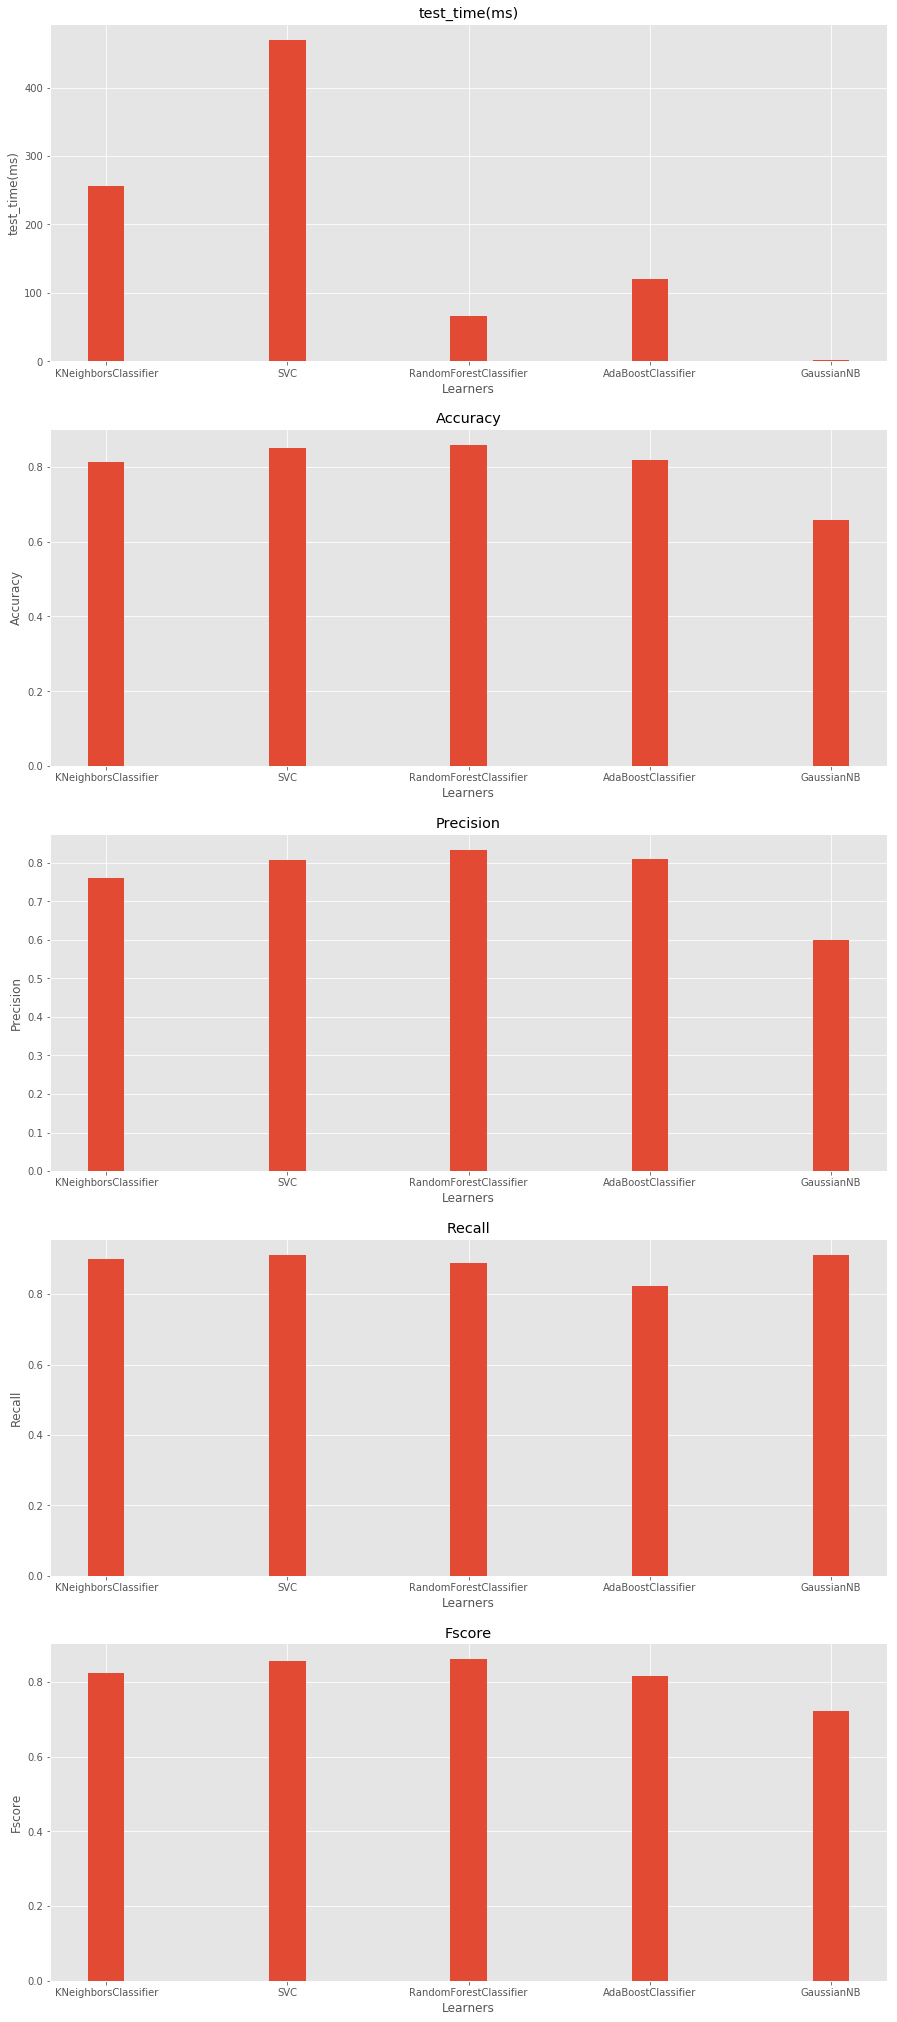

In [40]:
visualize(results, normalized_tuned_models)